## Q3: Climate

Download the data file of global surface air temperature averages from here:
https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-4/nasa-giss.txt
This data comes from: https://data.giss.nasa.gov/gistemp/graphs/

(Don't ask, of course you can download data straight from python! The library is called `urllib`)

There are 3 columns here: the year, the temperature change, and a smoothed representation of the temperature change.  

  * Read in this data using `np.loadtxt()`.  
  * Plot as a line the smoothed representation of the temperature changes.  
  * Plot as points the temperature change (no smoothing).  Color the points blue if they are < 0 and color them red if they are >= 0
  
You might find the numpy `where()` function useful.

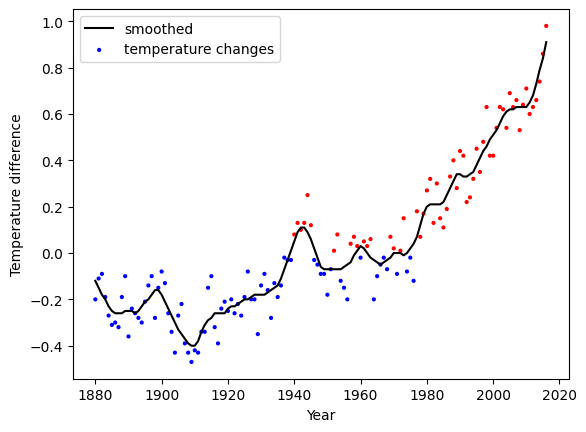

In [2]:
import numpy as np
import matplotlib.pyplot as plt
climate=np.loadtxt('climate.txt')

fig, ax =plt.subplots()
colors = np.where(climate[:,1] < 0, 'blue', 'red')
ax.plot(climate[:,0],climate[:,2],label='smoothed',color='black')
ax.scatter(climate[:,0],climate[:,1],label='temperature changes',c=colors,s=4)
ax.set_xlabel('Year')
ax.set_ylabel('Temperature difference')
ax.legend()

## Q6: Mandelbrot set

The [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set) is defined such that $z_{k+1} = z_k^2 + c$
remains bounded, which is usually taken as $|z_{k+1}| <= 2$
where $c$ is a complex number and we start with $z_0 = 0$

We want to consider a range of $c$, as complex numbers $c = x + iy$,
where $-2 < x < 2$ and $-2 < y < 2$.

For each $c$, identify its position on a Cartesian grid as $(x,y)$ and 
assign a value $N$ that is the number of iterations, $k$, required for $|z_{k+1}|$ to become greater than $2$.

The plot of this function is called the Mandelbrot set.

Here's a simple implementation that just does a fixed number of iterations and then colors points in Z depending on whether they satisfy $|z| \le 2$.  

Your task is to extend this to record the number of iterations it takes for each point in the Z-plane to violate that constraint,
and then plot that data -- it will show more structure


In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi']= 200
N = 1000
x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)

xv, yv = np.meshgrid(x, y, indexing="ij")


In [4]:
c = xv + 1j*y
iterations=10
z = np.zeros((N, N), dtype=np.complex128)
count = np.zeros((N, N), dtype=np.int8)


#print(np.reshape(z[np.abs(z)<1],(N,N)))

for i in range(iterations):
    z[np.abs(z)<2] = z[np.abs(z)<2]**2 + c[np.abs(z)<2]
    count[np.abs(z)<=2] +=1
    
m = np.ones((N, N))


m[np.abs(z) <= 2] = 0.0

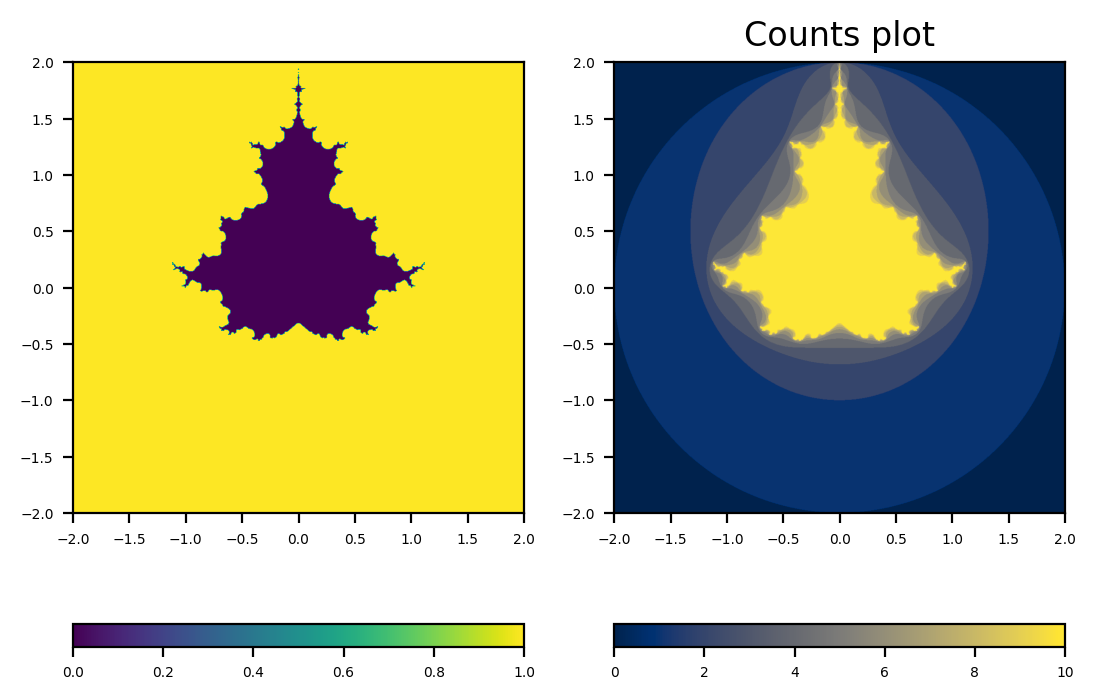

In [7]:
fig, ax = plt.subplots(1,2)
im0=ax[0].imshow(m,extent=[-2,2,-2,2])
ax[0].tick_params(axis='both',labelsize=5)

im1=ax[1].imshow(count,cmap='cividis',extent=[-2,2,-2,2])
ax[1].tick_params(axis='both',labelsize=5)
ax[1].set_title('Counts plot') 

cbar1=fig.colorbar(im1,shrink=1,location='bottom')
cbar0=fig.colorbar(im0,shrink=1,location='bottom')
cbar0.ax.tick_params(labelsize=5)
cbar1.ax.tick_params(labelsize=5)

